In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import requests
import time
import json
import hvplot.pandas
import seaborn as sns
# Impor the OpenWeatherMap API key
from API_keys import geoapify_key
from citipy import citipy
from datetime import datetime

In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
csv_file = Path("customer.csv")
customer_data_df = pd.read_csv(csv_file)

# Display sample data
customer_data_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Age,Spent,Living_With,TotalPurchases,Children,Family_Size,Is_Parent,Living_With_Descendants
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,971,64,1617,Alone,25,0,1,0,No
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,125,67,27,Alone,6,2,3,1,Yes
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,472,56,776,Partner,21,0,2,0,No
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,65,37,53,Partner,8,1,3,1,Yes
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,321,40,422,Partner,19,1,3,1,Yes


In [4]:

# Group the DataFrame by Family_Size, Living_With, and Living_With_Descendants
grouped_data = customer_data_df.groupby(['Family_Size', 'Living_With', 'Living_With_Descendants']).size().reset_index(name='Count')

# Display the grouped data
grouped_data

,Family_Size,Living_With,Living_With_Descendants,Count
0,1,Alone,No,252
1,2,Alone,Yes,374
2,2,Partner,No,380
3,3,Alone,Yes,139
4,3,Partner,Yes,740
5,4,Alone,Yes,19
6,4,Partner,Yes,277
7,5,Partner,Yes,31


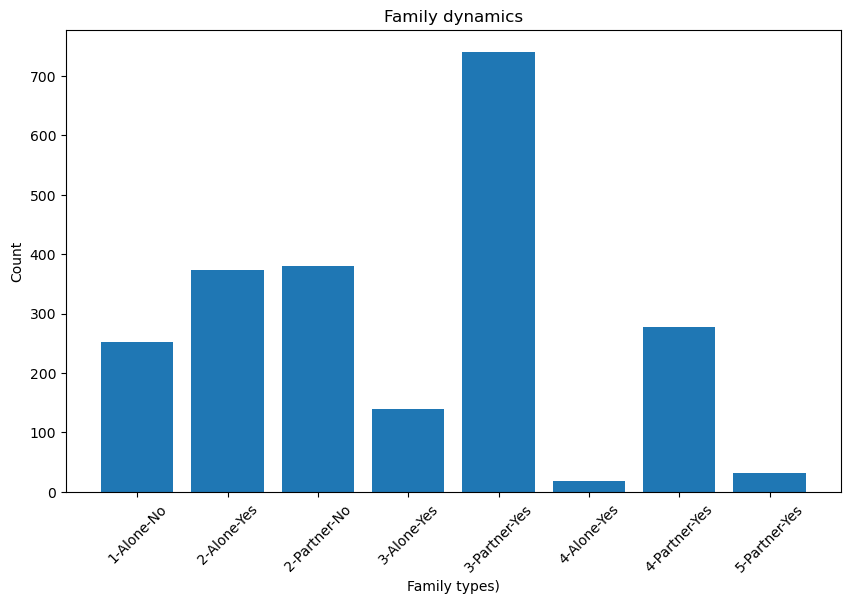

In [5]:

# Group the DataFrame by Family_Size, Living_With, and Living_With_Descendants
grouped_data = customer_data_df.groupby(['Family_Size', 'Living_With', 'Living_With_Descendants']).size().reset_index(name='Count')

# Create a bar chart using the grouped data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis labels as a combination of the groupby columns
x_labels = [f"{row['Family_Size']}-{row['Living_With']}-{row['Living_With_Descendants']}" for _, row in grouped_data.iterrows()]

ax.bar(x_labels, grouped_data['Count'])

ax.set_xlabel('Family types)')
ax.set_ylabel('Count')
ax.set_title('Family dynamics')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.savefig("family-dynamic.png")
plt.show()


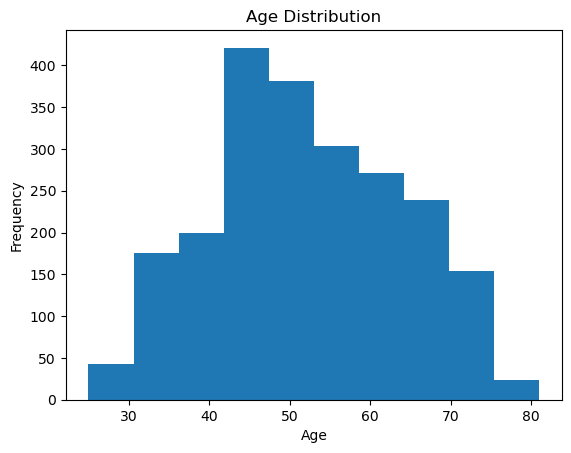

In [6]:
# Age Distribution Histogram
plt.hist(customer_data_df['Age'],bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.style.use('ggplot')
plt.savefig("Age-dist.png")

plt.show()



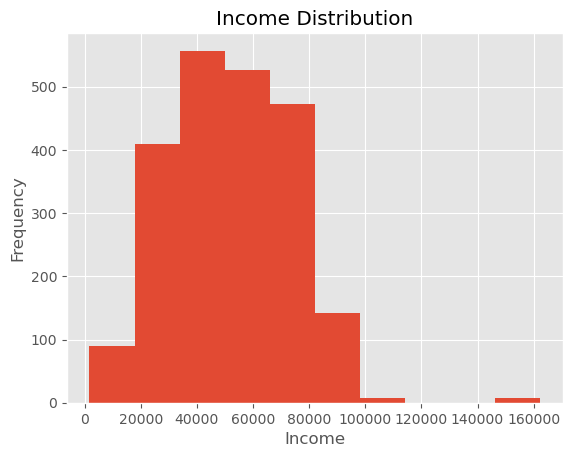

In [7]:
## Income Distribution Histogram
plt.style.use('ggplot')
plt.hist(customer_data_df['Income'], bins=10)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

plt.savefig("Income-dist.png")


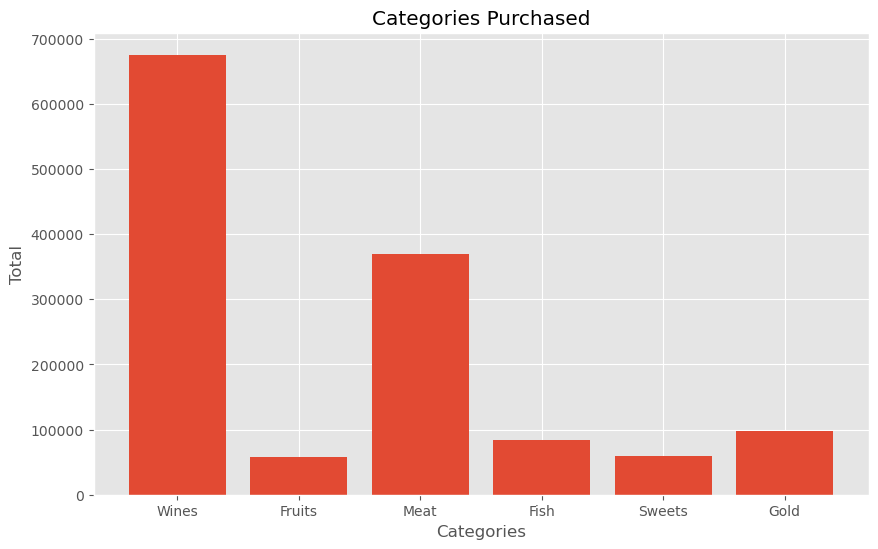

In [8]:
# Assuming your DataFrame is named 'df'
# Convert the relevant columns to numeric data types (if not already numeric)
numeric_columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
customer_data_df[numeric_columns] = customer_data_df[numeric_columns].apply(pd.to_numeric)

# Calculate the sum of each column
column_sums = customer_data_df[numeric_columns].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(numeric_columns, column_sums)
plt.title('Categories Purchased')
plt.xlabel('Categories')
plt.ylabel('Total')
plt.savefig("cat_purch.png")
plt.show()

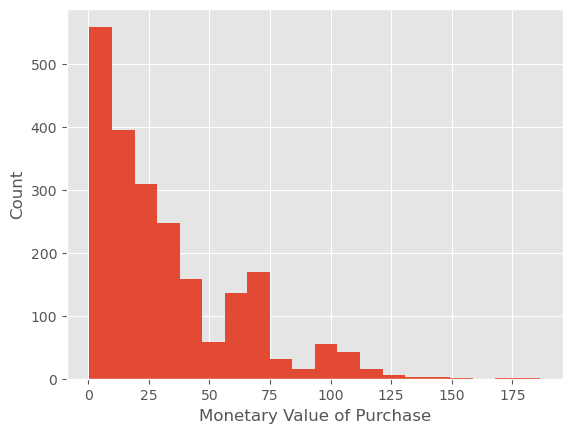

In [9]:
## Calculate the Monetary Value of Purchases
customer_data_df['MonetaryValue'] = customer_data_df['Spent'] / (customer_data_df['TotalPurchases'])
#Plot
monetary_values = customer_data_df['MonetaryValue']
monetary_values = monetary_values[np.isfinite(monetary_values)]
plt.hist(monetary_values, bins=20)
plt.xlabel('Monetary Value of Purchase')
plt.ylabel('Count')
plt.show()

In [10]:
spent = customer_data_df['Spent'].sum()
customer = customer_data_df['Spent'].count()
basket_size = spent / customer
basket_size

607.2680831826401

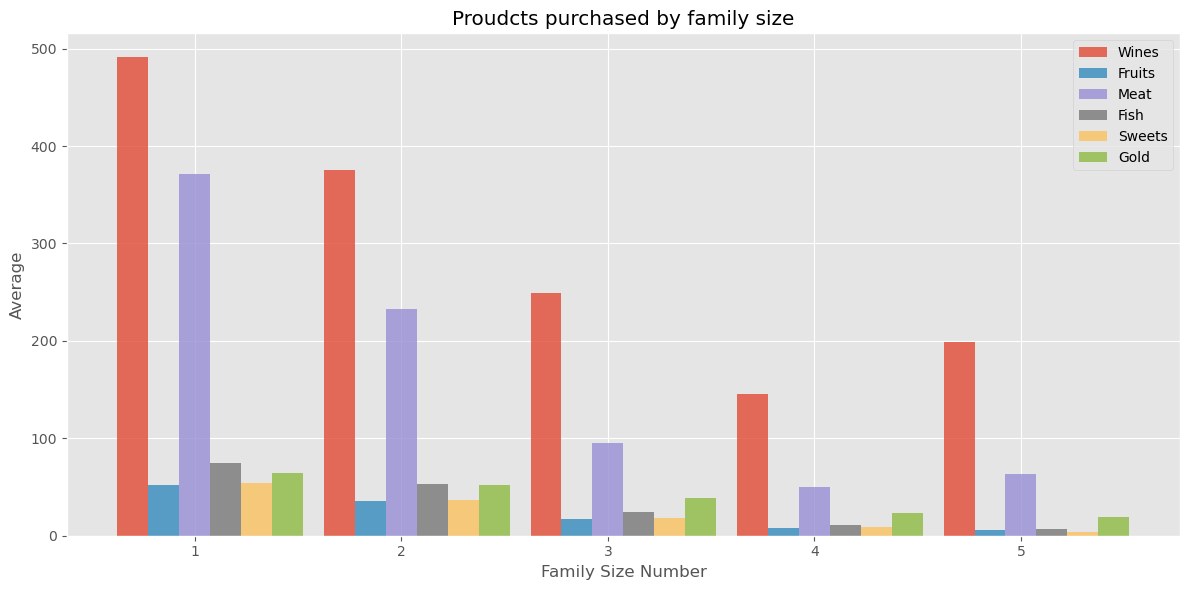

In [11]:
# Assuming your DataFrame is named 'df'
# Convert the relevant columns to numeric data types (if not already numeric)
numeric_columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
customer_data_df[numeric_columns] = customer_data_df[numeric_columns].apply(pd.to_numeric)
customer_data_df['Family_Size'] = customer_data_df['Family_Size'].apply(pd.to_numeric)

# Group the data by 'Family_Size' and calculate the sum of each column
grouped_data = customer_data_df.groupby('Family_Size')[numeric_columns].mean().reset_index()

# Create the grouped bar chart
n_groups = len(grouped_data['Family_Size'])
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

plt.figure(figsize=(12, 6))

for idx, col in enumerate(numeric_columns):
    plt.bar(index + bar_width * idx, grouped_data[col], bar_width, alpha=opacity, label=col)

plt.title('Proudcts purchased by family size')
plt.xlabel('Family Size Number')
plt.ylabel('Average')
plt.xticks(index + bar_width * 2, grouped_data['Family_Size'])
plt.legend()
plt.tight_layout()
plt.savefig("inc_prod.png")
plt.show()

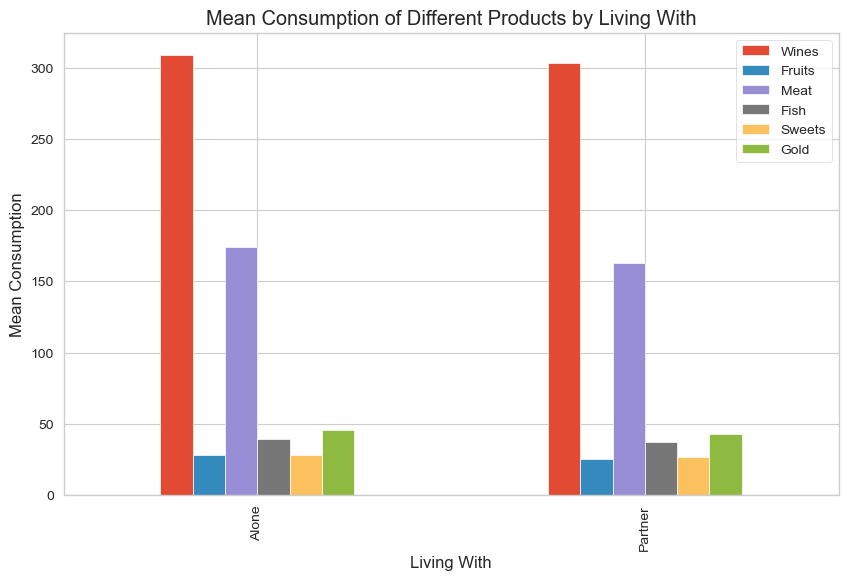

In [12]:
# Group the data by 'Living_With' and calculate the mean consumption for each product
grouped_data = customer_data_df.groupby('Living_With')[['Wines','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean()
# Create a bar plot to visualize the mean consumption for each product by 'Living_With'
sns.set_style('whitegrid')
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Living With')
ax.set_ylabel('Mean Consumption')
ax.set_title('Mean Consumption of Different Products by Living With')
# Show the plot
plt.show()

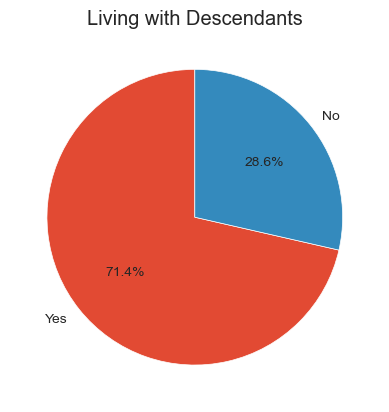

In [13]:
# Get counts of Living with Descendants
living_with_descendants_counts = customer_data_df['Living_With_Descendants'].value_counts()
# Create a pie chart
plt.pie(living_with_descendants_counts, labels=living_with_descendants_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Living with Descendants')
plt.show()

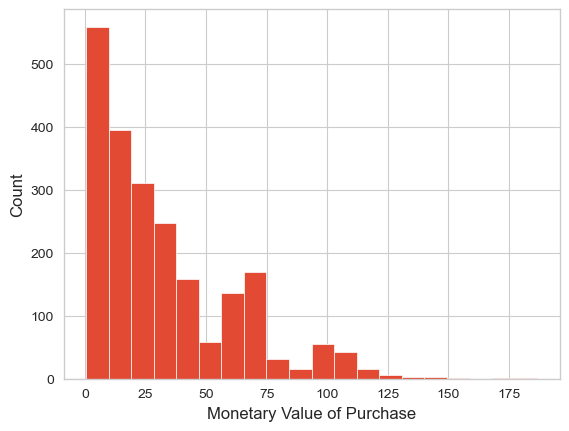

In [14]:

## Calculate the Monetary Value of Purchases
customer_data_df['MonetaryValue'] = customer_data_df['Spent'] / (customer_data_df['NumDealsPurchases'] + customer_data_df['NumWebPurchases'] + customer_data_df['NumCatalogPurchases'] + customer_data_df['NumStorePurchases'])
#Plot
monetary_values = customer_data_df['MonetaryValue']
monetary_values = monetary_values[np.isfinite(monetary_values)]
plt.hist(monetary_values, bins=20)
plt.xlabel('Monetary Value of Purchase')
plt.ylabel('Count')
plt.show()

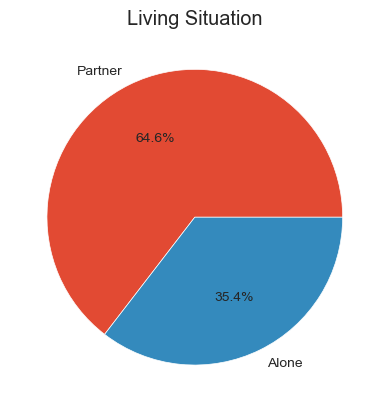

In [15]:
status_counts = customer_data_df['Living_With'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Living Situation')
plt.savefig("living.png")
plt.show()

Proportion of spending by customers who live with descendants: 48.05%
Proportion of spending by customers who do not live with descendants: 51.95%


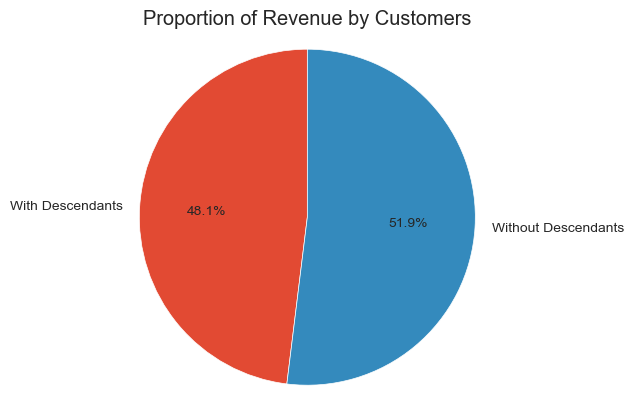

In [16]:
# Calculate the total spending for all customers
total_spending = customer_data_df['Spent'].sum()

# Calculate the total spending for customers who live with descendants
spending_with_descendants = customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'Yes', 'Spent'].sum()

# Calculate the total spending for customers who do not live with descendants
spending_without_descendants = customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'No', 'Spent'].sum()

# Calculate the proportion of spending by customers who live with descendants and who do not live with descendants
prop_with_descendants = spending_with_descendants / total_spending * 100
prop_without_descendants = spending_without_descendants / total_spending * 100

# Print the results
print('Proportion of spending by customers who live with descendants: {:.2f}%'.format(prop_with_descendants))
print('Proportion of spending by customers who do not live with descendants: {:.2f}%'.format(prop_without_descendants))

# Define the data for the pie chart
labels = ['With Descendants', 'Without Descendants']
sizes = [prop_with_descendants, prop_without_descendants]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
ax.set_title('Proportion of Revenue by Customers')

# Show the chart
plt.show()

In [17]:
# Calculate the total spending for customers who live with descendants
count_with_descendants = customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'Yes',].count()

# Calculate the total spending for customers who do not live with descendants
count_descendants = customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'No',].count()

In [18]:
count_with_descendants

Education                  1580
Income                     1580
Kidhome                    1580
Teenhome                   1580
Recency                    1580
Wines                      1580
Fruits                     1580
Meat                       1580
Fish                       1580
Sweets                     1580
Gold                       1580
NumDealsPurchases          1580
NumWebPurchases            1580
NumCatalogPurchases        1580
NumStorePurchases          1580
NumWebVisitsMonth          1580
AcceptedCmp3               1580
AcceptedCmp4               1580
AcceptedCmp5               1580
AcceptedCmp1               1580
AcceptedCmp2               1580
Complain                   1580
Response                   1580
Customer_For               1580
Age                        1580
Spent                      1580
Living_With                1580
TotalPurchases             1580
Children                   1580
Family_Size                1580
Is_Parent                  1580
Living_W

In [19]:
count_descendants

Education                  632
Income                     632
Kidhome                    632
Teenhome                   632
Recency                    632
Wines                      632
Fruits                     632
Meat                       632
Fish                       632
Sweets                     632
Gold                       632
NumDealsPurchases          632
NumWebPurchases            632
NumCatalogPurchases        632
NumStorePurchases          632
NumWebVisitsMonth          632
AcceptedCmp3               632
AcceptedCmp4               632
AcceptedCmp5               632
AcceptedCmp1               632
AcceptedCmp2               632
Complain                   632
Response                   632
Customer_For               632
Age                        632
Spent                      632
Living_With                632
TotalPurchases             632
Children                   632
Family_Size                632
Is_Parent                  632
Living_With_Descendants    632
Monetary

In [20]:
# Calculate the total spending for customers who live with descendants
total_spending_with_descendants = customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'Yes', 'Spent'].sum()

# Calculate the total number of customers who live with descendants
num_customers_with_descendants = len(customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'Yes'])

# Calculate the per capita spending for customers who live with descendants
per_capita_spending_with_descendants = total_spending_with_descendants / num_customers_with_descendants


# Calculate the total spending for customers who do not live with descendants
total_spending_without_descendants = customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'No', 'Spent'].sum()

# Calculate the total number of customers who do not live with descendants
num_customers_without_descendants = len(customer_data_df.loc[customer_data_df['Living_With_Descendants'] == 'No'])

# Calculate the per capita spending for customers who do not live with descendants
per_capita_spending_without_descendants = total_spending_without_descendants / num_customers_without_descendants

# Print the results
print('Per capita spending by customers who live with descendants: ${:.2f}'.format(per_capita_spending_with_descendants))
print('Per capita spending by customers who do not live with descendants: ${:.2f}'.format(per_capita_spending_without_descendants))


Per capita spending by customers who live with descendants: $408.55
Per capita spending by customers who do not live with descendants: $1104.06


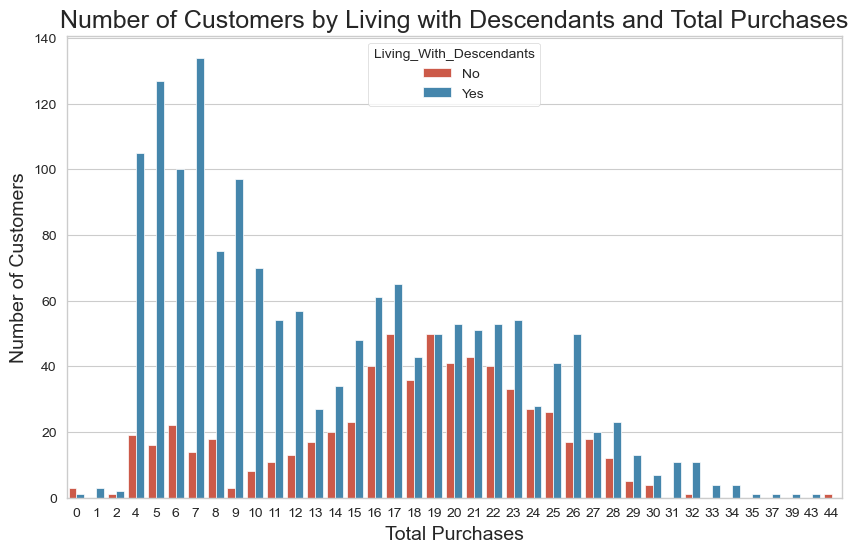

In [21]:
# Group by Living with Descendants and TotalPurchases, count the number of customers
grouped = customer_data_df.groupby(['Living_With_Descendants', 'TotalPurchases']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPurchases', y='count', hue='Living_With_Descendants', data=grouped)
plt.title('Number of Customers by Living with Descendants and Total Purchases', fontsize=18)
plt.xlabel('Total Purchases', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.savefig("living_stich_purch.png")
plt.show()

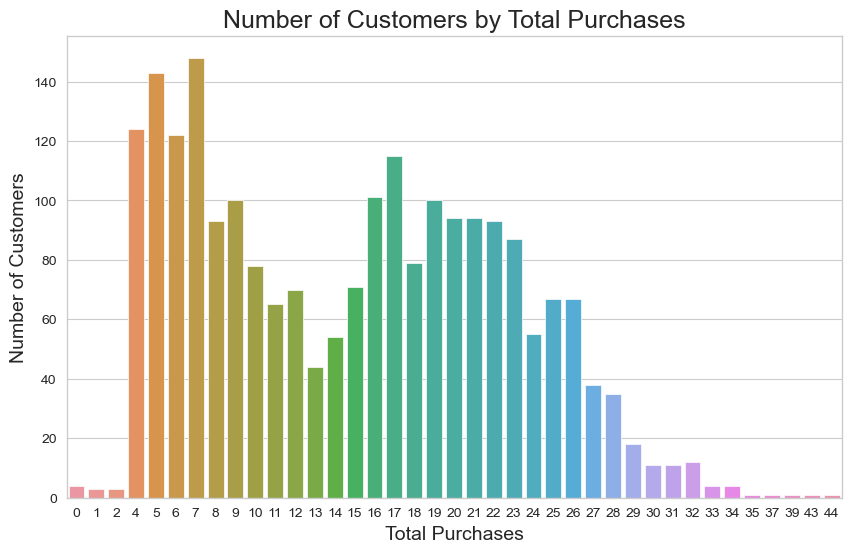

In [22]:
# Group by Living with Descendants and TotalPurchases, count the number of customers
grouped = customer_data_df.groupby(['TotalPurchases']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPurchases', y='count', data=grouped)
plt.title('Number of Customers by Total Purchases', fontsize=18)
plt.xlabel('Total Purchases', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.savefig("living_stich_purch.png")
plt.show()

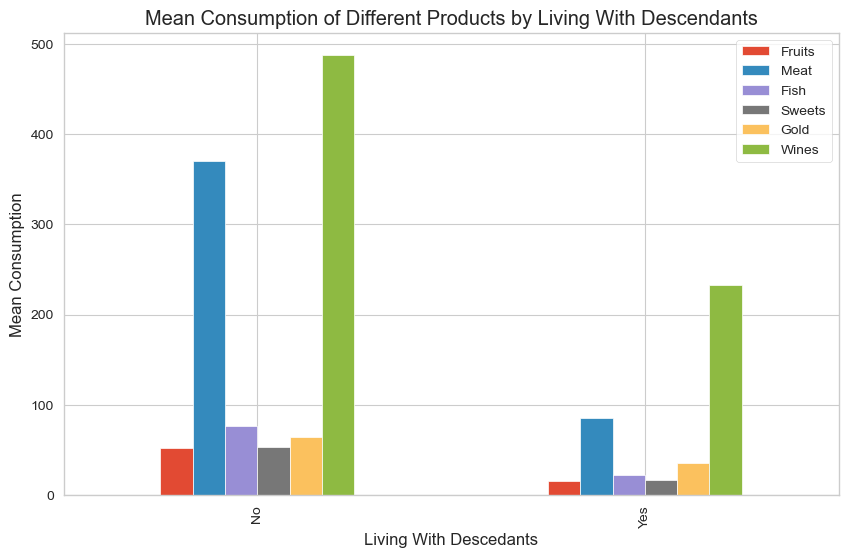

In [23]:
# Group the data by 'Living_With' and calculates the mean consumption for each product
grouped_data = customer_data_df.groupby('Living_With_Descendants')[['Fruits', 'Meat', 'Fish', 'Sweets', 'Gold','Wines']].mean()

# Create a bar plot to visualize the mean consumption for each product by 'Living_With'
sns.set_style('whitegrid')
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Living With Descedants')
ax.set_ylabel('Mean Consumption')
ax.set_title('Mean Consumption of Different Products by Living With Descendants')

# Show the plot
plt.show()

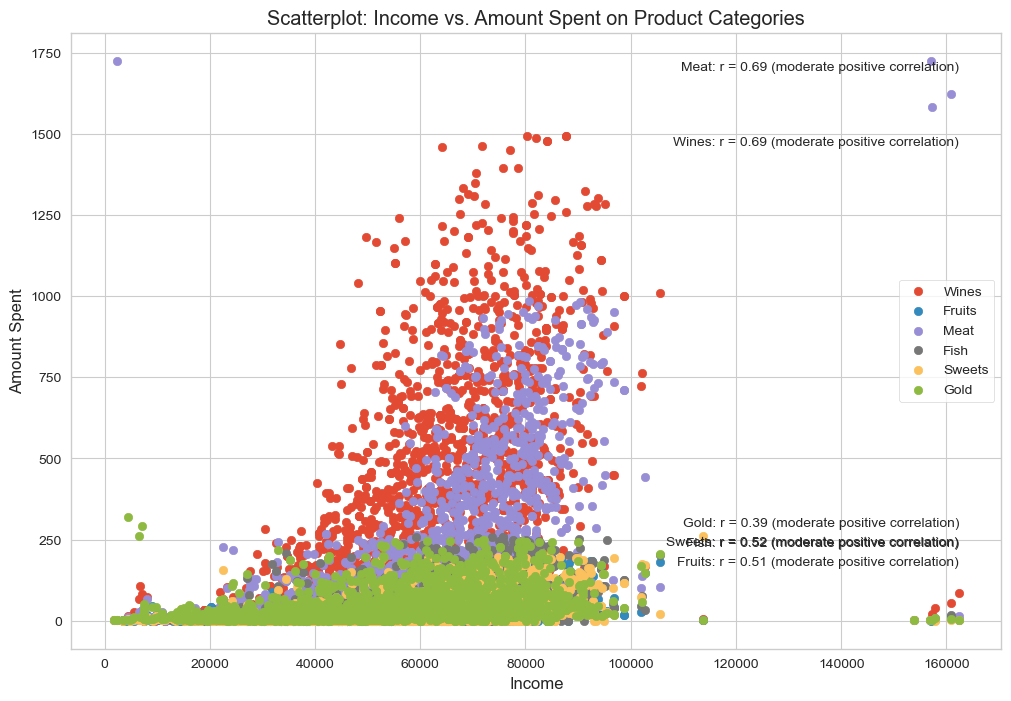

In [24]:

# Assuming your DataFrame is named 'customer_data_df'
# Convert the relevant columns to numeric data types (if not already numeric)
numeric_columns = ['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
customer_data_df[numeric_columns] = customer_data_df[numeric_columns].apply(pd.to_numeric)

# Create the scatterplot
plt.figure(figsize=(12, 8))

for col in ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']:
    plt.scatter(customer_data_df['Income'], customer_data_df[col], label=col)

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(customer_data_df['Income'], customer_data_df[col])[0, 1]

    # Determine the strength and direction of the correlation
    if correlation_coefficient > 0.7:
        statement = "strong positive correlation"
    elif correlation_coefficient > 0.3:
        statement = "moderate positive correlation"
    elif correlation_coefficient > -0.3:
        statement = "weak correlation"
    elif correlation_coefficient > -0.7:
        statement = "moderate negative correlation"
    else:
        statement = "strong negative correlation"

    # Display the correlation coefficient, statement, and product category on the plot
    plt.text(customer_data_df['Income'].max(), customer_data_df[col].max(),
             f"{col}: r = {correlation_coefficient:.2f} ({statement})",
             horizontalalignment='right', verticalalignment='top')

plt.title('Scatterplot: Income vs. Amount Spent on Product Categories')
plt.xlabel('Income')
plt.ylabel('Amount Spent')
plt.legend()
# Add the equation to the plot
plt.savefig("inc_prod.png")
plt.show()


In [25]:
corr = customer_data_df['Income'].corr(customer_data_df['Spent'])
print(f"The correlation coefficient between 'Income' and 'Spent' is {corr:.2f}")

The correlation coefficient between 'Income' and 'Spent' is 0.79


In [26]:
#corr2 = customer_data_df[numeric_columns].corr(customer_data_df['Income'])
print(f"The correlation coefficient between 'Income' and 'Spent' is {correlation_coefficient:.2f}")

The correlation coefficient between 'Income' and 'Spent' is 0.39


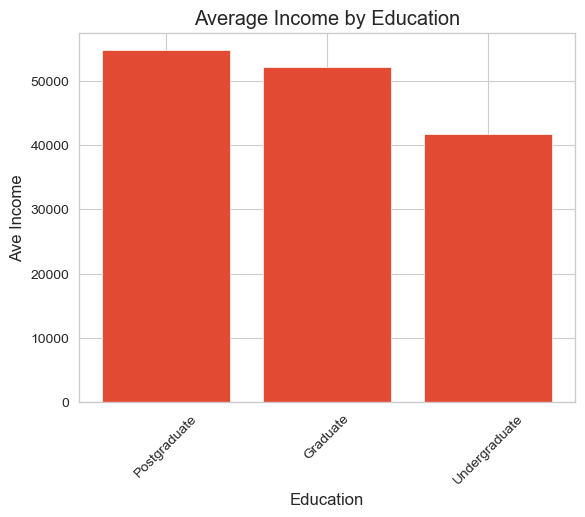

In [27]:
# Graph that calculates the average income of each marital status group
avg_income = customer_data_df.groupby("Education")["Income"].mean().sort_values(ascending=False)

# Create a bar chart of the average income for each marital status group
plt.bar(avg_income.index, avg_income.values)
plt.xticks(rotation=45)
plt.xlabel("Education")
plt.ylabel("Ave Income")
plt.title("Average Income by Education")
plt.show()

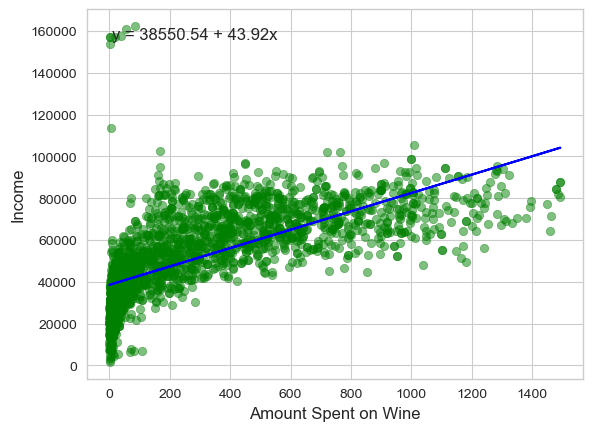

In [28]:
# Filter out negative values of x
x = customer_data_df[customer_data_df['Wines'] >= 0]['Wines']
y = customer_data_df[customer_data_df['Wines'] >= 0]['Income']
# Calculate the slope, intercept, rvalue, pvalue, stderr of the regression line
slope, intercept, r_value, p_value, stderr = linregress(x, y)
# Plot the scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, color='green')
ax.plot(x, intercept + slope*x, color='blue')
# Add the equation to the plot
equation = 'y = {:.2f} + {:.2f}x'.format(intercept, slope)
ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12,
        verticalalignment='top')
# Set the x and y labels
ax.set_xlabel('Amount Spent on Wine')
ax.set_ylabel('Income')
# Show the plot
plt.show()

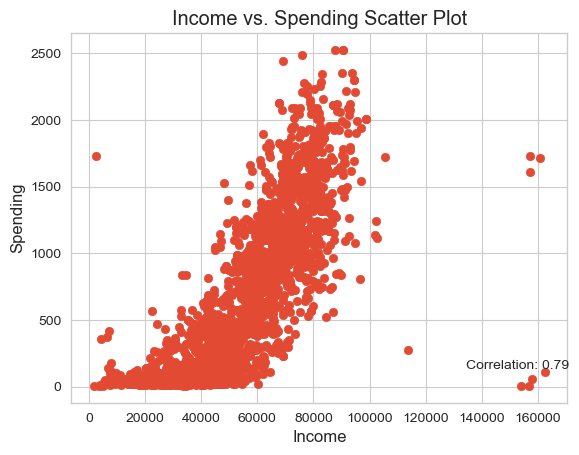

In [29]:

# Extract income and spending data from the dataframe
income = customer_data_df['Income']
spending = customer_data_df['Spent']

# Create scatter plot
plt.scatter(income, spending)

# Set axis labels and title
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Income vs. Spending Scatter Plot')

# Calculate correlation coefficient
corr_coef = np.corrcoef(income, spending)[0][1]

# Add correlation coefficient to the plot
plt.text(0.9, 0.1, f'Correlation: {corr_coef:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()